# McCall (1970) model with a finite horizon

A worker lives in periods $t=0,1,\ldots ,T$. Every period, she receives an
iid job offer drawn from a distribution with cdf $F\left( w\right) $ that
has a support on $\left[ 0,B\right] $. If she accepts a wage offer $w$ in
period $t$, she receives the wage $w$ for periods $t$, $t+1$, $\ldots $, $T$%
, is not fired, and cannot quit. If she does not accept, she receives an
unemployment benefit $c\in \lbrack 0,B)$ and then receives a new offer in
period $t+1$ (as long as $t+1\leq T$). The worker maximizes the present
discounted value of wages and discount the future at rate $\beta \in \left(
0,1\right) $.

Let $V_{t}\left( w\right) $ be the value
at time $t$ of an unemployed worker who has at hand (but has not yet
accepted) a wage offer $w$.

The Bellman equation for the problem is given by

\begin{eqnarray*}
V_{t}\left( w\right) &=&\max_{\left\{ \text{accept, reject}\right\} }\left\{
\sum_{\tau =t}^{T}\beta ^{\tau -t}w,c+\beta \int_{0}^{B}V_{t+1}\left(
w^{\prime }\right) dF\left( w^{\prime }\right) \right\} \\
&=&\max_{\left\{ \text{accept, reject}\right\} }\left\{ \frac{1-\beta
^{T-t+1}}{1-\beta }w,c+\beta \int_{0}^{B}V_{t+1}\left( w^{\prime }\right)
dF\left( w^{\prime }\right) \right\} .
\end{eqnarray*}

with the last-period value function serving as the terminal condition

\begin{equation}
V_{T}\left( w\right) =\max_{\left\{ \text{accept, reject}\right\} }\left\{ w,c \right\}.
\end{equation}

Since the value of accepting the offer is strictly increasing in the current offer $w$, while the value of rejecting is independent of the current offer (but dependent on time $t$), the optimal policy is a time-dependent reservation wage $\bar{w}_t$. The above equation also implies that $\bar{w}_T = c$.

The recursion for $V_t$ can be rewritten as a recursion for the reservation wage $\bar{w}_t$. As in the infinite-horizon
case, the worker who receives the reservation wage $\bar{w}$ is indifferent
between accepting and rejecting the offer, and we rewrote this indifference
condition as a function of $\bar{w}$ only. The finite horizon case is
analogous but the indifference condition relates time-$t$ reservation wage $%
\bar{w}_{t}$ with the expectation of time-$t+1$ continuation value $%
V_{t+1}\left( w\right) $, so substituting this expectation out will yield a
relationship between $\bar{w}_{t}$ and $\bar{w}_{t+1}$.

Hence we have, for $t<T$:

\begin{eqnarray*}
\frac{1-\beta ^{T-t+1}}{1-\beta }\bar{w}_{t} &=&c+\beta
\int_{0}^{B}V_{t+1}\left( w^{\prime }\right) dF\left( w^{\prime }\right) = \\
&=&c+\beta \int_{0}^{\bar{w}_{t+1}}V_{t+1}\left( w^{\prime }\right) dF\left(
w^{\prime }\right) +\beta \int_{\bar{w}_{t+1}}^{B}V_{t+1}\left( w^{\prime
}\right) dF\left( w^{\prime }\right)
\end{eqnarray*}

Now notice that the argument in the first integral is equal to $\frac{%
1-\beta ^{T-t}}{1-\beta }\bar{w}_{t+1}$, while the argument in the second
integral is equal to $\frac{1-\beta ^{T-t}}{1-\beta }w^{\prime }$. We can
proceed in several ways, for instance:

\begin{eqnarray}
\frac{1-\beta ^{T-t+1}}{1-\beta }\bar{w}_{t} &=&c+\beta \int_{0}^{\bar{w}%
_{t+1}}\frac{1-\beta ^{T-t}}{1-\beta }\bar{w}_{t+1}dF\left( w^{\prime
}\right) +\beta \int_{\bar{w}_{t+1}}^{B}\frac{1-\beta ^{T-t}}{1-\beta }%
w^{\prime }dF\left( w^{\prime }\right)  \notag \\
&=&c+\beta \frac{1-\beta ^{T-t}}{1-\beta }\left[ \int_{0}^{\bar{w}%
_{t+1}}\left( \bar{w}_{t+1}-w\right) dF\left( w^{\prime }\right)
+\int_{0}^{B}w^{\prime }dF\left( w^{\prime }\right) \right]  \notag \\
&=&c+\beta \frac{1-\beta ^{T-t}}{1-\beta }\left[ E\left[ w^{\prime }\right]
-\int_{0}^{\bar{w}_{t+1}}\left( w-\bar{w}_{t+1}\right) dF\left( w^{\prime
}\right) \right]
\end{eqnarray}

Given $\bar{w}_{t+1}$, we can use this equation to compute $\bar{w}_{t}$ be
evaluating the integrals on the right-hand side.

## Implementation using value function iteration

We discretize the
problem on a grid. Choose a grid of nodes $w^{k}$, $k=0,\ldots K$, such that
$0=w^{0}<w^{1}<\ldots <w^{K}=B$. One frequent choice is to split the grid
equidistantly in $K$ subintervals of length $B/K$, such that \thinspace $%
w^{k}=Bk/K$. We then replace the distribution of wage offers $F\left(
w\right) $ on $\left[ 0,B\right] $ with a discrete distribution $\hat{f}%
^{k}\doteq \hat{f}\left( w^{k}\right) $ on nodes $w^{k}$ that approximates $%
F\left( w\right) $, for example,

\begin{equation*}
\hat{f}^{k}=\left\{
\begin{array}{cc}
\displaystyle F\left( \frac{1}{2}\left( w^{1}+w^{0}\right) \right) & k=0 \\
\displaystyle F\left( \frac{1}{2}\left( w^{k+1}+w^{k}\right) \right)
-F\left( \frac{1}{2}\left( w^{k}+w^{k-1}\right) \right) & 0<k<K \\
\displaystyle1-F\left( \frac{1}{2}\left( w^{K}+w^{K-1}\right) \right) & k=K%
\end{array}
\right.
\end{equation*}

We can then approximate the integral in the Bellman equation as%
\begin{equation}
\int_{0}^{B}V_{t+1}\left( w^{\prime }\right) dF\left( w^{\prime }\right)
\approx \sum_{k=0}^{K}V_{t+1}\left( w^{k}\right) \hat{f}^{k}\text{.}
\label{eq:mccall_BE_discretization}
\end{equation}%

We now have a Bellman equation for $\hat{V}_{t}=\left( \hat{V}%
_{t}^{0},\ldots ,\hat{V}_{t}^{K}\right) ^{\prime },$
\begin{equation*}
\hat{V}_{t}^{k}=\max_{\left\{ \text{accept, reject}\right\} }\left\{ \frac{%
1-\beta ^{T-t+1}}{1-\beta }w^{k},c+\beta \sum_{j=0}^{K}\hat{V}_{t+1}^{j}\hat{%
f}^{j}\right\} \text{,\quad }k=0,1,\ldots ,K.
\end{equation*}


Notice that this equation is very easy to implement on a computer. When $K$
and $T$ are reasonably small, you can generate a matrix with $T+1$ columns
and $K+1$ rows (for nodes $k=0,1,\ldots ,K$ and periods $t=0,1,\ldots ,T$).
Now proceed from the end. Take the last column of the matrix and populate it
with values $V_{T}\left( w^{k}\right) $ in every node $k=0,1,\ldots ,K$.
Then take the second-last column and use the Bellman equation to populate
the column with values $V_{T-1}\left( w^{k}\right) $. Proceed until $t=0$.

In every time period $t$, we use the indifference condition between accepting
and rejecting the job offer to record the reservation wage $\bar{w}_{t}$.

We first need to import libraries required for some specialized tasks. The first line assures that plots are rendered in the current notebook.

In [1]:
%matplotlib inline                       
import numpy as np                       # import library for numerical operations
import scipy.stats as sp                 # import library that includes probability distributions
import matplotlib.pyplot as plt          # import library for drawing
plt.rcParams['figure.figsize'] = (10,6)  # define size of the plots

We use the following parameter values: $T=50$, $\beta =0.97$, $B=1$, $c=0.3$. For the distribution $F\left(
w\right) $, we start with the normal distribution with mean $\mu =0.5$ and
variance $\sigma ^{2}=0.1$, and truncate it to the interval $\left[ 0,B%
\right] $ (remember that the truncation implies that you need to renormalize
the distribution so that it integrates to one.

Choosing $K=100$ yields satisfactory results.

We first define a function that constructs the grid, then call it, and plot the resulting discretized distribution.

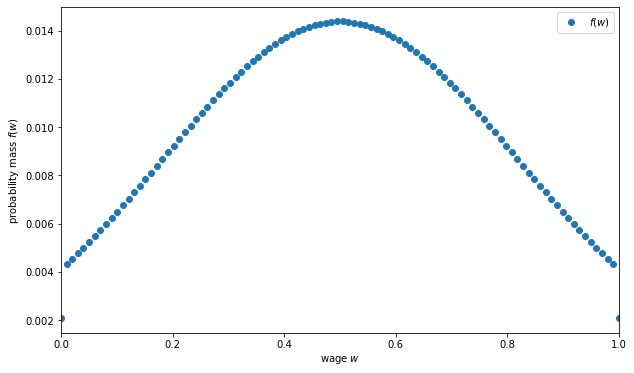

In [2]:
def construct_grid(mu,sigma,B,K):
    # constructs a discrete approximation of the normal distribution truncated to [0,B]
    w_grid = np.linspace(0,B,K)

    f = sp.norm(mu,sigma)       
    F_midpoints = f.cdf(np.concatenate([[0],np.array((w_grid[0:-1] + w_grid[1:])/2),[B]]))
    f_grid = F_midpoints[1:]-F_midpoints[0:-1]
    f_grid = f_grid/sum(f_grid)

    return w_grid,f_grid


# now we can define the parameters of  the wage offer distribution
mu = 0.5; sigma2 = 0.1       # parameters of the normal distribution
B = 1                        # highest offer
K = 100                      # number of grid points

w_grid,f_grid = construct_grid(mu=mu,sigma=sigma2**0.5,B=B,K=K)

# plot the wage offer distribution
fig, ax = plt.subplots()                                   # define plot
ax.plot(w_grid, f_grid, 'o', label='$f(w)$')              # plot the probability mass function
ax.set(xlabel='wage $w$',ylabel='probability mass $f(w)$') # describe axes
ax.legend();                                                # include legend
ax.set_xlim([0,B]);

We now define the function that computes the sequence of value functions $V_t$ and reservation wages $\bar{w}_t$.

In [3]:
def mccall_model_finite_horizon(w_grid,f,c,β,T):
    # solves the McCall model on a given grid w_grid,
    # with discrete density of the wage offer distribution f defined on the grid,
    # unemployment compensation c, and time preference parameter β
    
    V = np.zeros(len(w_grid)*(T+1))   # define the matrix that stores first num_iter iterates
    V.shape=(len(w_grid),T+1)
    wbar = np.zeros(T+1)
    V_cur = np.zeros(len(w_grid))                 # define the vector for the value function

    for t in range(T,-1,-1):
        Q = c+β*sum(V_cur*f)                  # value of rejecting the offer
        V_a = w_grid*(1-β**(T-t+1))/(1-β)     # value of accepting the offer
        V_cur = np.maximum(Q,V_a)
        V[:,t] = V_cur
        wbar[t] = (1-β)/(1-β**(T-t+1))*Q
        
    return V,wbar

We can call it, and plot the sequence of value functions.

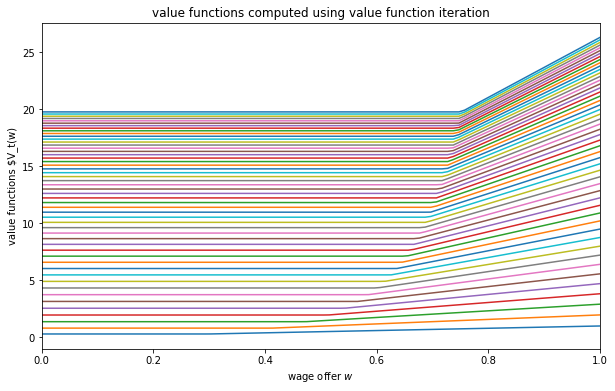

In [4]:
# structural parameters of the model
T = 50                                 # horizon of the model, t = 0,1,...,T
c = 0.3                                # unemployment benefits
β = 0.97                               # time preference

# run value function iteration
V,wbar = mccall_model_finite_horizon(w_grid=w_grid,f=f_grid,c=c,β=β,T=T)

fig, ax = plt.subplots()                                   # define plot
for t in range(T,-1,-1):
    ax.plot(w_grid, V[:,t], '-', label=f'$V_{t}$')          # plot the probability mass function
ax.set(xlabel='wage offer $w$',ylabel='value functions $V_t(w)')        # describe axes
ax.set_title('value functions computed using value function iteration')
ax.set_xlim([0,B]);

We can also plot the reservation wage.

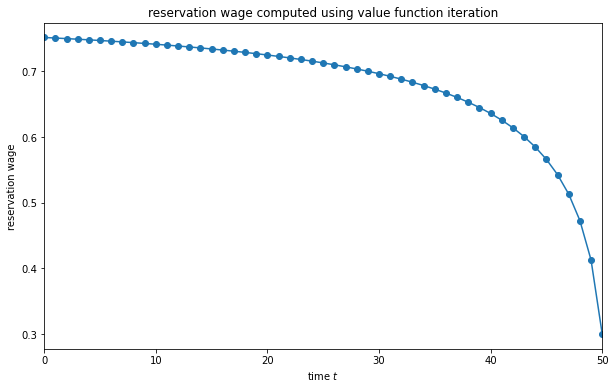

In [5]:
# plot the path of the reservation wages
fig, ax = plt.subplots()                                   # define plot
ax.plot(range(0,T+1), wbar, '-o', label='$f(w)$')          # plot the probability mass function
ax.set(xlabel='time $t$',ylabel='reservation wage')        # describe axes
ax.set_title('reservation wage computed using value function iteration')
ax.set_xlim([0,T]);

Next, we compute the reservation wage by iterating on the reservation wage. We create the appropriate function for that.

In [6]:
def mccall_model_finite_horizon_wbar_iteration(w_grid,f,c,β,T):
    # iterates on the reservation wage equation to calculate wbar[t]
    # with discrete density of the wage offer distribution f defined on the grid,
    # unemployment compensation c, and time preference parameter β
    
    wbar = np.zeros(T+1)              # vector of reservation wages
    wbar_cur = 0                      # initial reservation wage (thought of as one for time T+1)
    Ew = sum(w_grid*f)

    for t in range(T,-1,-1):
        wbar_cur = (1-β)/(1-β**(T-t+1)) * (c + β*(1-β**(T-t))/(1-β) * (Ew - sum((w_grid<=wbar_cur)*(w_grid-wbar_cur)*f)))
        wbar[t] = wbar_cur
        
    return wbar

We can now run the iteration and plot the resulting graph. Not surprisingly, it looks the same as the one above.

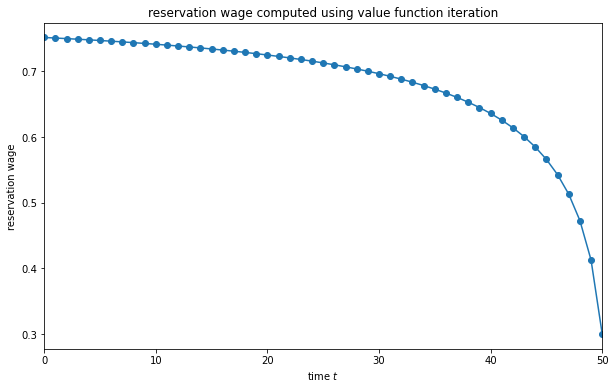

In [7]:
# run iteration on the reservation wage
wbar_witer = mccall_model_finite_horizon_wbar_iteration(w_grid=w_grid,f=f_grid,c=c,β=β,T=T)

# plot the path of the reservation wages
fig, ax = plt.subplots()                                   # define plot
ax.plot(range(0,T+1), wbar_witer, '-o', label='$f(w)$')          # plot the probability mass function
ax.set(xlabel='time $t$',ylabel='reservation wage')        # describe axes
ax.set_title('reservation wage computed using value function iteration')
ax.set_xlim([0,T]);

Finally, we can construct the mean-preserving spread and compare results. As expected, reservation wages for the distribution constructed using the mean-preserving spread are higher.

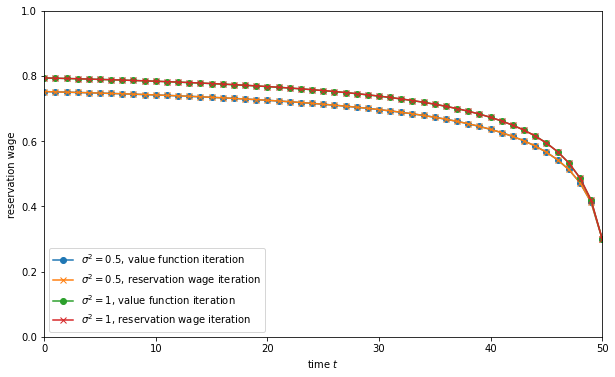

In [10]:
sigma2_mps = 1
w_grid,f_grid_mps = construct_grid(mu=mu,sigma=sigma2_mps**0.5,B=B,K=K)

V_mps,wbar_mps = mccall_model_finite_horizon(w_grid=w_grid,f=f_grid_mps,c=c,β=β,T=T)
wbar_witer_mps = mccall_model_finite_horizon_wbar_iteration(w_grid=w_grid,f=f_grid_mps,c=c,β=β,T=T)

# plot the path of the reservation wages
fig, ax = plt.subplots()                                   # define plot
ax.plot(range(0,T+1), wbar, '-o', label='$\sigma^2 = 0.5$, value function iteration')
ax.plot(range(0,T+1), wbar_witer, '-x', label='$\sigma^2 = 0.5$, reservation wage iteration')
ax.plot(range(0,T+1), wbar_mps, '-o', label='$\sigma^2 = 1$, value function iteration')
ax.plot(range(0,T+1), wbar_witer_mps, '-x', label='$\sigma^2 = 1$, reservation wage iteration')
ax.set(xlabel='time $t$',ylabel='reservation wage')        # describe axes
ax.legend(loc='lower left')
ax.set_xlim([0,T]);
ax.set_ylim([0,B]);